In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [ ]:
df = pd.read_csv('ufo_sightings_scrubbed.csv')

df['latitude'] = df["latitude"].str.replace(r"[a-zA-Z]",'')
df = df.astype({'latitude': 'str'})
df = df.astype({'longitude ': 'str'})

df['longitude '] = df["longitude "].str.replace(r"[a-zA-Z]",'')

df = df.astype({'latitude': 'float64'})
df = df.astype({'longitude ': 'float64'})

df.dtypes
len(df)

In [ ]:
BBox = (df["longitude "].min(),   df["longitude "].max(),      
         df["latitude"].min(), df["latitude"].max())
BBox

In [ ]:
ruh_m = plt.imread('map.png')


In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df["longitude "], df["latitude"], zorder=1, alpha= 0.2, c='b', s=0.1)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

In [ ]:
# NEXT BLOCK

In [7]:
df = pd.read_csv('ufo_sightings_scrubbed.csv')

df = df.astype({'latitude': 'str'})
df = df.astype({'longitude ': 'str'})
df['latitude'] = df["latitude"].str.replace(r"[a-zA-Z]",'')
df['longitude '] = df["longitude "].str.replace(r"[a-zA-Z]",'')
df['latitude'] = df["latitude"].str.replace(" ",'')
df['longitude '] = df["longitude "].str.replace(" ",'')

df = df.astype({'latitude': 'float64'})
df = df.astype({'longitude ': 'float64'})

/Users/pavan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
world_map = gpd.read_file('ne_110m_land.shp')

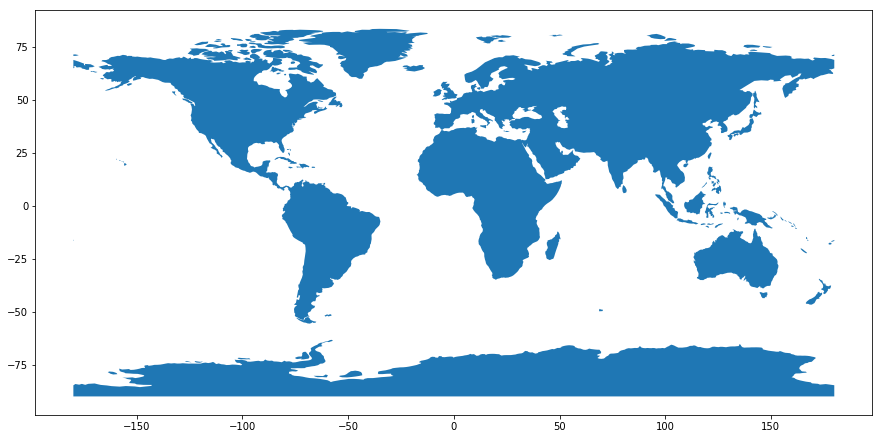

In [9]:
fig, ax = plt.subplots(figsize = (15,15))
world_map.plot(ax = ax)

In [17]:
crs = {'init': 'epsg:4326'}
print(df["longitude "].dtype)
print(df["latitude"].dtype)


float64
float64


In [18]:
geometry = [Point(xy) for xy in zip(df["longitude "], df["latitude"])]

In [20]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry=geometry)
geo_df.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,geometry
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,POINT (-97.94111 29.88306)
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,POINT (-98.58108 29.38421)
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,POINT (-2.91667 53.20000)
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,POINT (-96.64583 28.97833)
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,POINT (-157.80361 21.41806)


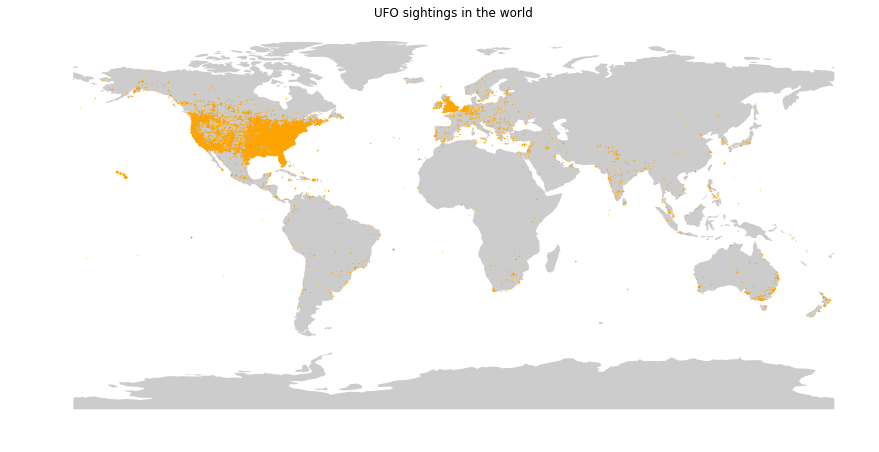

In [33]:
fig, ax = plt.subplots(figsize = (15, 15))
world_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['city'] != 'asdasdasd'].plot(ax = ax, markersize = 0.05, color = 'orange', marker = 'o')
plt.title("UFO sightings in the world")
plt.axis('off')
plt.savefig("ufo_map.png", bbox_inches="tight")
